https://www.kaggle.com/datasets/ellipticco/elliptic-data-set

"The Elliptic Data Set maps Bitcoin transactions to real entities belonging to licit categories (exchanges, wallet providers, miners, licit services, etc.) versus illicit ones (scams, malware, terrorist organizations, ransomware, Ponzi schemes, etc.). The task on the dataset is to classify the illicit and licit nodes in the graph."



This anonymized data set is a transaction graph collected from the Bitcoin blockchain. It consists of 203,769 nodes and 234,355 edges, with 2% of nodes labelled as illicit (class1) and 21% labelled as licit (class2). There are 166 features associated with each node, 94 of which are local features such as the time step, number of inputs/outputs, transaction fee, and output volume. The remaining 72 features are aggregated features obtained from one-hop backward/forward from the center node, including maximum, minimum, standard deviation and correlation coefficients.

Sources:
https://builtin.com/data-science/unsupervised-learning-python

https://realpython.com/logistic-regression-python/

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Preparing data

Used for data cleaning: https://www.kaggle.com/code/guyensoto/fraud-detection-system

In [4]:
features = pd.read_csv("elliptic_txs_features.csv")
edgelist = pd.read_csv("elliptic_txs_edgelist.csv")
classes = pd.read_csv("elliptic_txs_classes.csv")

In [5]:
features.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [6]:
edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [7]:
classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [8]:
# renaming columns
features.columns = ['id', 'time'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [9]:
# merge with classes
raw_features = pd.merge(features, classes, left_on='id', right_on='txId', how='left')
grouped = raw_features.groupby(['time', 'class'])['id'].count().reset_index().rename(columns={'id': 'count'})
grouped.head()

,time,class,count
0,1,1,17
1,1,2,2130
2,1,unknown,5732
3,2,1,18
4,2,2,1099


In [10]:
raw_features=raw_features.rename(columns={"class":"Class"})
raw_features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,txId,Class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,5530458,unknown
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,232022460,unknown
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,232438397,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,230460314,unknown
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,230459870,unknown


In [11]:
cleaned_df = raw_features.copy()
# You don't want the `Time` column.
cleaned_df.pop('time')
# You don't want the `txId` column.
cleaned_df.pop('txId')
# You don't want the `id` column.
cleaned_df.pop('id')

0           5530458
1         232022460
2         232438397
3         230460314
4         230459870
            ...    
203763    173077460
203764    158577750
203765    158375402
203766    158654197
203767    157597225
Name: id, Length: 203768, dtype: int64

In [12]:
cleaned_df['Class'].replace({"unknown": "-1"}, inplace=True)
cleaned_df['Class'].replace({"1": "1"}, inplace=True)
cleaned_df['Class'].replace({"2": "0"}, inplace=True)
cleaned_df['Class'] = pd.to_numeric(cleaned_df['Class'])

In [13]:
cleaned_df.head()

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,-1
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,-1
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,-1
4,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,-1


In [14]:
#Create array of unknown Class randomly with the same proportion 1/10 between "zeros" and "ones"
#df["new_column"] = np.random.choice([1, 0], len(df), p=[0.7, 0.3])   #  0) First step
def rand_bin_array(K, N):
    arr = np.zeros(N,int)

    arr[:K]  = int( 1)
    np.random.shuffle(arr)
    return arr

In [15]:
# Put togheter all Classes
prueba_0=cleaned_df[cleaned_df['Class']==0] # 1) Split "0" Class array 
prueba_1=cleaned_df[cleaned_df['Class']==1] # 1) Split "1" Class array 
prueba=cleaned_df[cleaned_df['Class']==-1]  # 2) Split Class array "-1"
prueba['Class']=rand_bin_array(15720,157204)  # 3) Change Class array -1 (unknown) target with a relation 1/10  Illicit-Licit
vertical = pd.concat([prueba, prueba_0,prueba_1], axis=0) #4) Put together all Classes
vertical=vertical.sort_index()   # 5) Order again 
vertical

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20764\814872735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Class']=rand_bin_array(15720,157204)  # 3) Change Class array -1 (unknown) target with a relation 1/10  Illicit-Licit


,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
4,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203763,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,-0.142008,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203764,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,-0.162334,-0.049707,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
203765,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,-0.168778,-0.045389,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203766,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,-0.169317,-0.049707,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0


In [16]:
vertical["Class"].unique()

array([0, 1], dtype=int64)

In [17]:
vertical.columns

Index(['trans_feat_0', 'trans_feat_1', 'trans_feat_2', 'trans_feat_3',
       'trans_feat_4', 'trans_feat_5', 'trans_feat_6', 'trans_feat_7',
       'trans_feat_8', 'trans_feat_9',
       ...
       'agg_feat_63', 'agg_feat_64', 'agg_feat_65', 'agg_feat_66',
       'agg_feat_67', 'agg_feat_68', 'agg_feat_69', 'agg_feat_70',
       'agg_feat_71', 'Class'],
      dtype='object', length=166)

<AxesSubplot: >

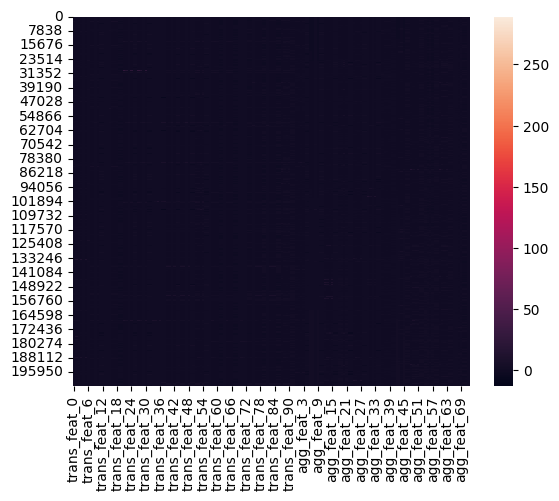

In [18]:
sns.heatmap(vertical)

In [19]:
# Fraud Like "1" and Not Fraud like "0"
non_fraud = vertical[vertical['Class'] == 0].sample(1000)
fraud = vertical[vertical['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [20]:
df.head()

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.172636,-0.178623,1.018602,0.028105,-0.063725,0.054722,-0.061584,-0.163645,-0.169122,-0.047222,...,-0.424391,0.241128,0.241406,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792,1
1,-0.172799,0.070018,1.573595,-0.046932,-0.043875,-0.029140,-0.061584,-0.163551,-0.169362,-0.049664,...,-0.197323,-0.979074,-0.978556,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792,1
2,-0.169157,-0.081127,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.159729,-0.165598,-0.049707,...,-0.493772,-0.979074,-0.978556,-0.098889,-0.08749,-0.084674,-0.140597,-1.760926,-1.760984,1
3,-0.172808,-0.175452,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163466,-0.169283,-0.049707,...,0.029745,1.461330,1.461369,-0.098889,-0.08749,-0.084674,-0.140597,-1.760926,-1.760984,1
4,-0.151905,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.142079,-0.148196,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21260,-0.172685,0.396451,0.463609,0.103143,-0.043875,0.138585,-0.061584,-0.163596,-0.169332,-0.049212,...,-0.607306,-0.979074,-0.978556,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792,1
21261,-0.172115,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162757,-0.168584,-0.049707,...,-0.537925,-0.979074,-0.978556,-0.098889,-0.08749,-0.084674,-0.140597,-1.760926,-1.760984,1
21262,-0.171478,-0.183580,0.463609,0.028105,-0.043875,0.054722,-0.061584,-0.163645,-0.168099,-0.040090,...,3.574524,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792,1
21263,-0.170419,-0.184668,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163496,-0.167022,-0.028784,...,-0.569462,-0.979074,-0.978556,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792,1


In [ ]:
df.describe()

#### Models evaluation against data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

class Model_pipeline:

    def __init__(self,X,Y):

        self.X = X
        self.Y = Y

    def eval_model_scores(self):

        X_train, X_test, y_train, y_test = train_test_split(self.X, self.Y, test_size=0.33, random_state=42)
        
        models = [
            RandomForestClassifier(n_estimators=50,random_state=42, criterion='entropy',max_depth=None, min_samples_split=2),
            svm.SVC(gamma="scale",kernel="rbf"),
            GaussianNB(),
            DecisionTreeClassifier(),
            LogisticRegression(),
            SGDClassifier(),
            KNeighborsClassifier()]
        model_names = ['rf','svm','dt','nb', 'lr', 'sgd', 'kn']

        accuracy = []
        for model in models:
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            accuracy.append(model.score(X_test, y_test))
        
        for i in range(7):
    
            print("Accuracy for " + model_names[i] + ": %.2f%%" % (accuracy[i] * 100.0))

In [33]:
Model_pipeline(X,Y).eval_model_scores()

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for rf: 95.84%
Accuracy for svm: 95.74%
Accuracy for dt: 93.49%
Accuracy for nb: 91.31%
Accuracy for lr: 95.60%
Accuracy for sgd: 94.96%
Accuracy for kn: 95.74%


#### Logistic regression

In [36]:

from sklearn.metrics import classification_report, confusion_matrix
#creates a lr model by passing in features of btc transactions, with target being class (illicit or not,1,0)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X,Y)


In [40]:
#the distinct values y takes in the lr model
print(model.classes_)
#get the slope b and intercent of the lr function
#print("Slope"model.intercept_)
#print(model.coef_)

print(f"Slope b1: {model.intercept_} and intercent bo: {model.coef_}.")


[0 1]
Slope b1: [2.72902676] and intercent bo: [[-0.3171478  -0.03780501 -0.03901168 -0.02600081  0.12540743  0.17871351
   0.04213606  0.2201885  -0.50717826  0.13802479  0.34358735  0.34966562
  -0.46395571  0.03798972  0.13727284  0.05524285  0.49621304 -0.48344037
   0.285275   -0.01936695  0.01049508  0.05332327 -0.42588051 -0.26982695
   0.00345879 -0.27832111  0.33677648  0.0537981  -0.42594189 -0.2699837
   0.00338317 -0.24520083  0.27129695 -0.63302454 -0.13613836 -0.08091282
   0.11949834  0.39994393 -0.4689787   0.07425468 -0.35906897 -0.21948146
   0.07174219 -0.36879914  0.51938193  0.13924822  0.03677178  0.07972896
   0.18714897  0.40526301 -0.59358417 -0.01948026 -0.70225705  0.10960236
   0.43148309  0.04484222 -0.13823815 -0.48797413 -0.4143602   0.09712569
   0.147569    0.08170208  0.14802991 -0.48825987 -0.4140891   0.09704101
   0.14735892 -0.07140776 -0.10227964  0.26187569 -0.43453091  0.03931586
   0.25154434 -0.15777658  0.12226772 -0.0155991  -0.16465241 -0.2

In [43]:
# checking performance, returns probabilities that the predicted output is equal to zero or one
print(model.predict_proba(X))
print()
#actual predictions, based on the probability matrix (that can be grabbed by predict_proba(x)) and the values of 𝑝(𝑥)
print(model.predict(X))
print()
#check how many correct predctions vs number of observations
print(model.score(X, Y))

[[0.05754348 0.94245652]
 [0.02051067 0.97948933]
 [0.02950784 0.97049216]
 ...
 [0.13105225 0.86894775]
 [0.03040773 0.96959227]
 [0.03019883 0.96980117]]

[1 1 1 ... 1 1 1]

0.9547613449329885


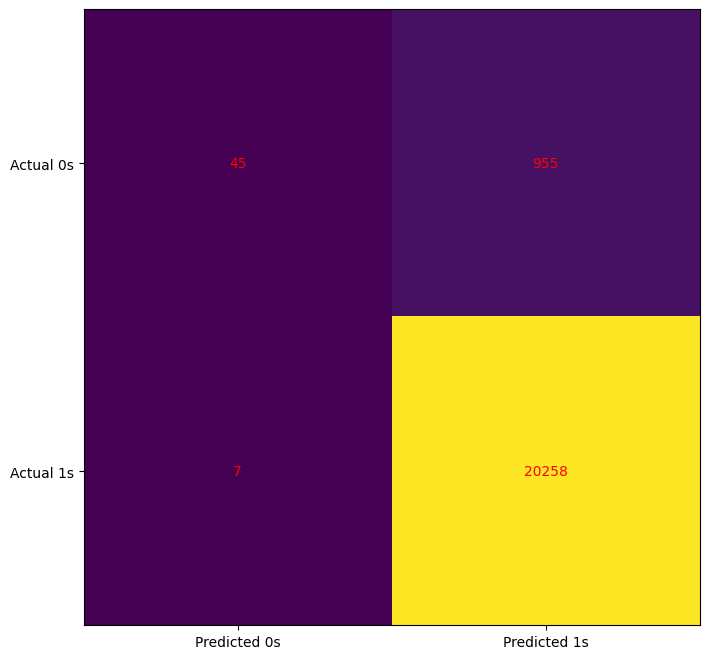

In [44]:
# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position

cm = confusion_matrix(Y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- 45 licit cases correctly identified as licit
- 7 illicit casses incorrectly identified as licit

- 955 licit cases incorrectly identified as illicit
- 20258 illicit cases correctly identified as illicit

In [47]:
print(classification_report(Y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.04      0.09      1000
           1       0.95      1.00      0.98     20265

    accuracy                           0.95     21265
   macro avg       0.91      0.52      0.53     21265
weighted avg       0.95      0.95      0.93     21265



#### Unsupervised clustering models
trying to cluster features to find similarities within/across illicit/licit cases

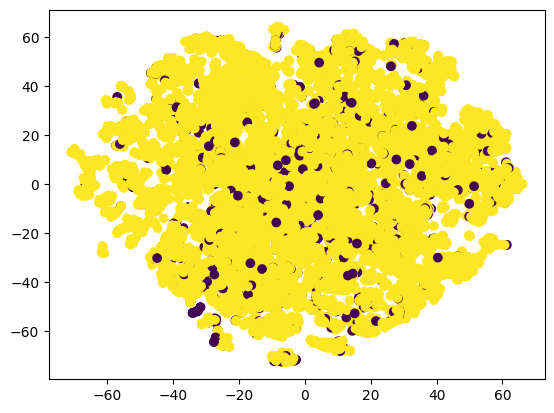

In [53]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(df)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=df.Class)
plt.show()

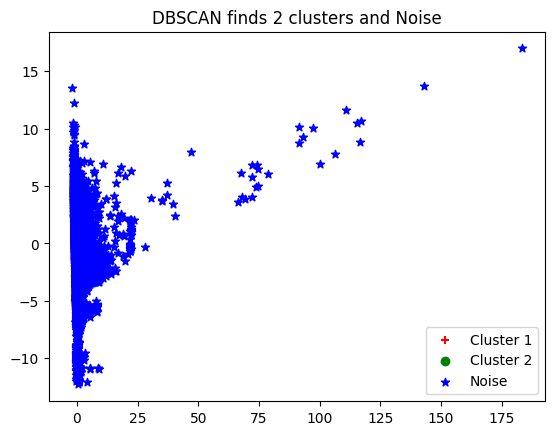

In [56]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(df)

# Transoring Using PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

### One-class Support vector machine 

In [58]:

outliers = Y[Y == 1]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

from sklearn import svm
# set nu (which should be the proportion of outliers in our dataset)
nu = outliers.shape[0] / Y.shape[0]
print("nu", nu)
model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005) 
model.fit(X_train)

nu 0.9529743710322126


OneClassSVM(gamma=5e-05, nu=0.9529743710322126)

In [61]:
# from sklearn import metrics
# preds = model.predict(X_train)
# targs = y_train 

# print("accuracy: ", metrics.accuracy_score(targs, preds))
# #print("precision: ", metrics.precision_score(targs, preds)) 
# print("recall: ", metrics.recall_score(targs, preds))
# print("f1: ", metrics.f1_score(targs, preds))
# print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))